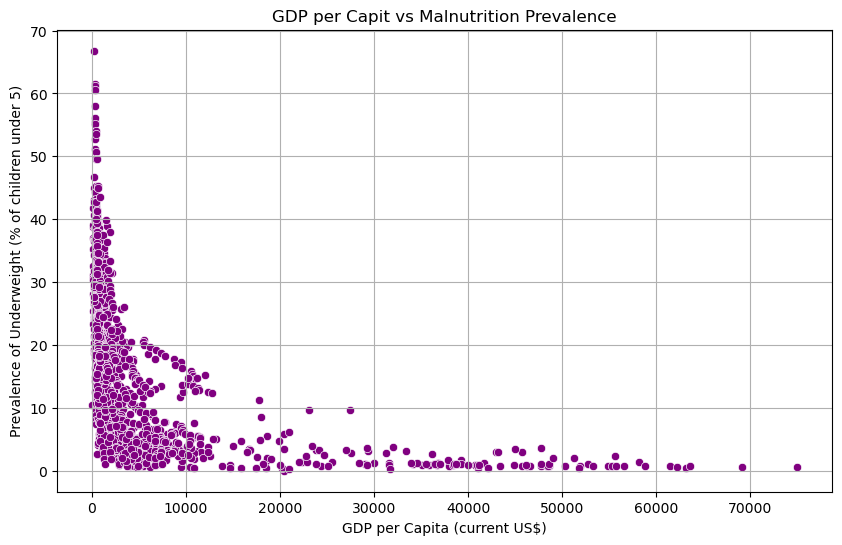

In [48]:
# Question One
# Using the World Bank Indicators, download data for “GDP per capita(current US$)” and “Prevalence of underweight, weight for age (% of
# children under 5).What kind of relationship do you expect? Make a scatter plot of malnutrition prevalence against GDP per capita 
# (using all available years and countries). What kind of relationship do you see? Make a scatter plot for the geographical regions 
# (six regions excluding North America and use a different color for each). Make a scatter plot for income levels 
# (four income levels and use a different color for each).Carefully label all graphs and provide legends.

# *************************Solution**********************************#

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


# ................................Data cleaning...............................#

gdp_df = pd.read_excel('GDPDataset.xls', sheet_name='Data', skiprows=3, usecols= list(range(0,2))+ list(range(4,68)))
gdp_cleaned = pd.melt(gdp_df, id_vars=["Country Code"], var_name='Year', value_vars=gdp_df.columns[2:], value_name='GDP per capita')
preverance_df = pd.read_excel('PreveranceUnderweightDataset.xls', sheet_name='Data', skiprows=3, usecols = list(range(0,2))+ list(range(4,68)))
preverance_cleaned = pd.melt(preverance_df, id_vars=["Country Code"], var_name='Year', value_vars=preverance_df.columns[2:], value_name='PreveranceUnderweight')

gdp_cleaned.fillna(0)
preverance_cleaned.fillna(0)

merged_df = gdp_cleaned.merge(preverance_cleaned, on =['Country Code', 'Year'], how = 'left')

#......................................Plotting malnutrition prevalence vs GDP per capita.......................#
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='GDP per capita', y='PreveranceUnderweight', color= 'purple')
plt.title('GDP per Capit vs Malnutrition Prevalence')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Prevalence of Underweight (% of children under 5)')
plt.grid()
plt.show()


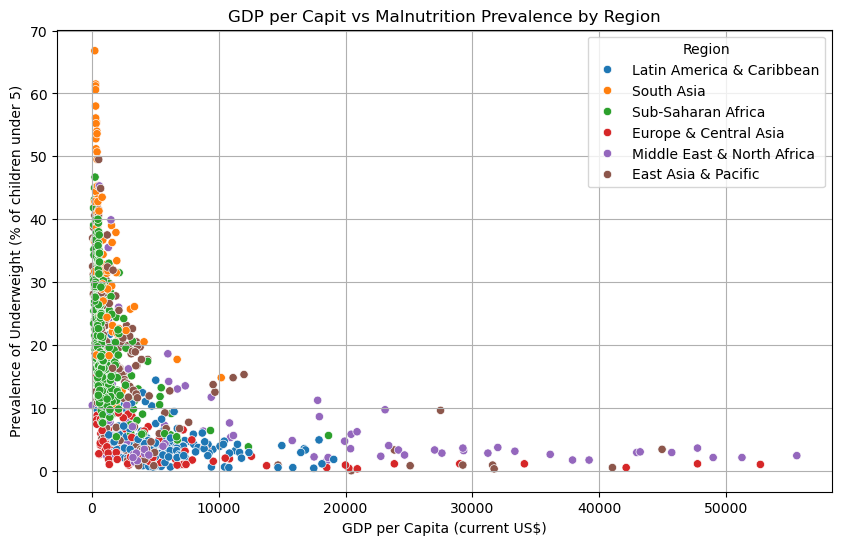

In [49]:
merged_df
# Reading the next sheet in the excel that has the column for the region
gdp_df = pd.read_excel ('GDPDataset.xls', sheet_name='Metadata - Countries')
# Adding the region to the other dataframe that is already merged
merged_df_meta = merged_df.merge(gdp_df, on =['Country Code'], how = 'left') 
# Excluding the North America region
new_merged_df_meta = merged_df_meta[merged_df_meta['Region'] != 'North America']
new_merged_df_meta.head()

#.........................................Plotting for the geographical regions....................................#

plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_merged_df_meta, x='GDP per capita', y='PreveranceUnderweight', hue='Region')
plt.title('GDP per Capit vs Malnutrition Prevalence by Region')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Prevalence of Underweight (% of children under 5)')
plt.grid()
plt.show()


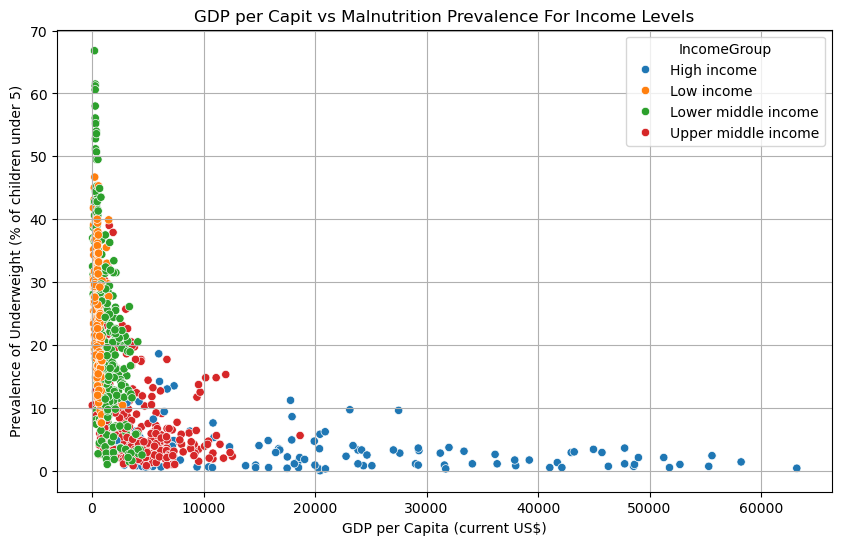

In [50]:
#.........................................Plotting for income levels....................................#
merged_df_meta.head()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_meta, x='GDP per capita', y='PreveranceUnderweight', hue='IncomeGroup')
plt.title('GDP per Capit vs Malnutrition Prevalence For Income Levels')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Prevalence of Underweight (% of children under 5)')
plt.grid()
plt.show()

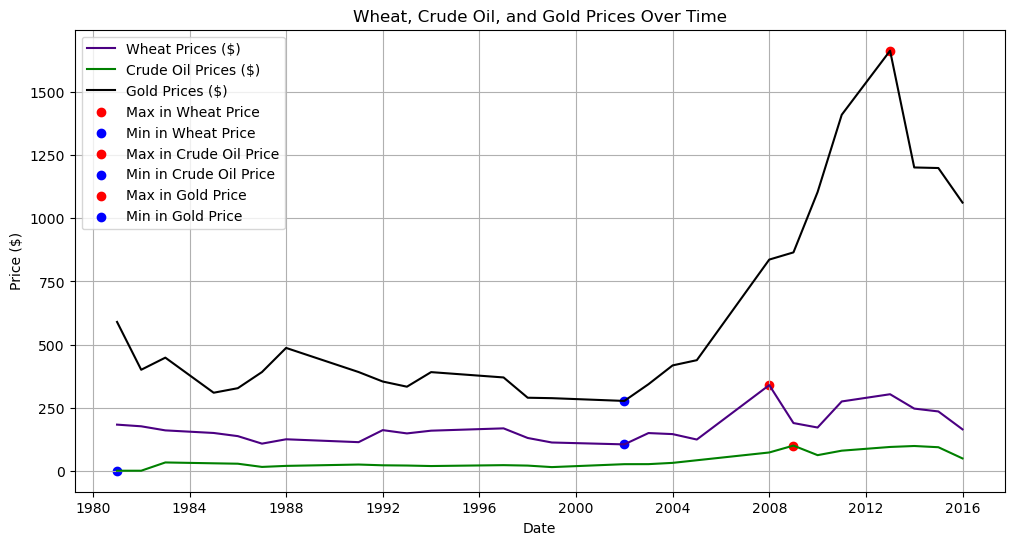

In [46]:
# Question Two
# Using Quandl, download data, synchronize the time stamps, and plot time series for the prices of Wheat, Crude Oil, and Gold in $ on the
# same graph. Indicate the maximum and minimum prices in all three time series using colored dots. Use a legend to explain each one.

# *************************Solution**********************************#
import quandl
import pandas as pd
import matplotlib.pyplot as plt

# quandl.ApiConfig.api_key = 'CP15PnXFRSd5xwQD3Rg_'
# wheat_prices = quandl.get('COM/PWHEAMT_USD')
# crude_oil_prices = quandl.get('WGEC/WLD_CRUDE_WTI')
# gold_price = quandl.get('BUNDESBANK/BBK01_WT5511')

wheat_prices = pd.read_csv("wheat.csv")
crude_oil_prices = pd.read_csv("crude-oil.csv")
gold_price = pd.read_csv("gold.csv")
wheat_prices['Date'] = pd.to_datetime(wheat_prices['Date'])
crude_oil_prices['Date'] = pd.to_datetime(crude_oil_prices['Date'])
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

wheat_prices.set_index('Date', inplace=True)
crude_oil_prices.set_index('Date', inplace=True)
gold_price.set_index('Date', inplace=True)

#.........................................Intersection of the data...................................#
dates = wheat_prices.index.intersection(crude_oil_prices.index).intersection(gold_price.index)
wheat_prices = wheat_prices.loc[dates]
crude_oil_prices = crude_oil_prices.loc[dates]
gold_price = gold_price.loc[dates]


#.........................................Plotting for Prices over time....................................#
plt.figure(figsize=(12, 6))
plt.plot(dates, wheat_prices, label='Wheat Prices ($)', color='indigo')
plt.plot(dates, crude_oil_prices, label='Crude Oil Prices ($)', color='green')
plt.plot(dates, gold_price, label='Gold Prices ($)', color='black')
for prices, color, label in [(wheat_prices, 'indigo', 'Wheat'), 
                             (crude_oil_prices, 'green', 'Crude Oil'), 
                             (gold_price, 'red', 'Gold')]:
    plt.scatter(prices.idxmax(), prices.max(), label=f'Max in {label} Price', color='red')
    plt.scatter(prices.idxmin(), prices.min(), label=f'Min in {label} Price',color='blue')

plt.title('Wheat, Crude Oil, and Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
# Question Three
# Download “CO2 emissions (metric tons per capita)” data from the World Bank Indicators. Select the emissions for all countries in 2010 and
# calculate summary statistics. Provide a table giving the mean, median, standard deviation, 5, 25, 75, and 95 percentiles.
# Repeat the same process for “School enrolment, primary (% net).

# *************************Solution**********************************#
import pandas as pd
from tabulate import tabulate

# Reading CO2 emissions data
#.........................................Reading data....................................#
co2_emissions_df = pd.read_excel("CO2Emissions.xls", skiprows=3, usecols="E:BO")
schoolenrollment_df = pd.read_excel("SchoolEnrollment.xls", skiprows=3, usecols="E:BO")

#.........................................Selecting 2010 data....................................#
co2_2010_emissions = co2_emissions_df['2010'] 
schoolenrollment_2010 = schoolenrollment_df['2010'] 

#.........................................CO2 emissions statistics calculation....................................#
co2_emissions_df_mean = co2_2010_emissions.mean()
co2_emissions_df_median = co2_2010_emissions.median()
co2_emissions_df_std = co2_2010_emissions.std()
co2_emissions_df_percentiles = co2_2010_emissions.quantile([0.05, 0.25, 0.75, 0.95])

#.........................................School enrollement statistics calculation....................................#
schoolenrollment_df_mean = schoolenrollment_2010.mean()
schoolenrollment_df_median = schoolenrollment_2010.median()
schoolenrollment_df_std = schoolenrollment_2010.std()
schoolenrollment_df_percentiles = schoolenrollment_2010.quantile([0.05, 0.25, 0.75, 0.95])

#.........................................Displaying the results in a table....................................#
table = [
    ["Metric", "CO2 Emissions (2010)"],
    ["Mean", co2_emissions_df_mean],
    ["Median", co2_emissions_df_median],
    ["Standard Deviation", co2_emissions_df_std],
    ["5th Percentile", co2_emissions_df_percentiles.loc[0.05]],
    ["25th Percentile", co2_emissions_df_percentiles.loc[0.25]],
    ["75th Percentile", co2_emissions_df_percentiles.loc[0.75]],
    ["95th Percentile", co2_emissions_df_percentiles.loc[0.95]],
]
print(f"************ CO2 2010 Emission Statistics *************")
print(tabulate(table, tablefmt="grid"))
table_2 = [
    ["Metric", "School Enrollment (2010)"],
    ["Mean", schoolenrollment_df_mean],
    ["Median", schoolenrollment_df_median],
    ["Standard Deviation",schoolenrollment_df_std],
    ["5th Percentile", schoolenrollment_df_percentiles.loc[0.05]],
    ["25th Percentile", schoolenrollment_df_percentiles.loc[0.25]],
    ["75th Percentile", schoolenrollment_df_percentiles.loc[0.75]],
    ["95th Percentile", schoolenrollment_df_percentiles.loc[0.95]],
]

print(f"************* 2010 School Enrolment Statistics *********")
print (tabulate(table_2, tablefmt="grid")) # Click on the "scrollable element button" to  view the whole table


************ CO2 2010 Emission Statistics *************
+--------------------+----------------------+
| Metric             | CO2 Emissions (2010) |
+--------------------+----------------------+
| Mean               | 4.3046589913441835   |
+--------------------+----------------------+
| Median             | 2.6671397243982278   |
+--------------------+----------------------+
| Standard Deviation | 5.069185691529372    |
+--------------------+----------------------+
| 5th Percentile     | 0.11486037886188374  |
+--------------------+----------------------+
| 25th Percentile    | 0.7560111050219943   |
+--------------------+----------------------+
| 75th Percentile    | 5.891798207361757    |
+--------------------+----------------------+
| 95th Percentile    | 15.172008595332846   |
+--------------------+----------------------+
************* 2010 School Enrolment Statistics *********
+--------------------+--------------------------+
| Metric             | School Enrollment (2010) |
+----

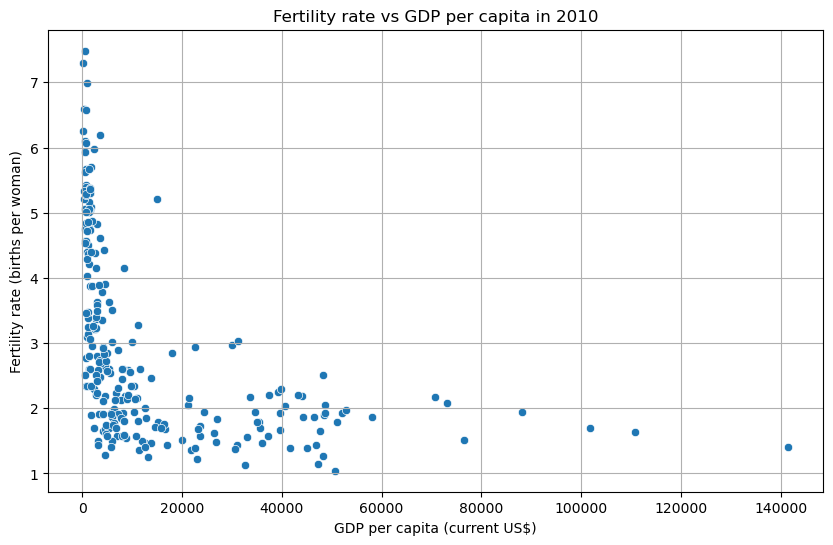

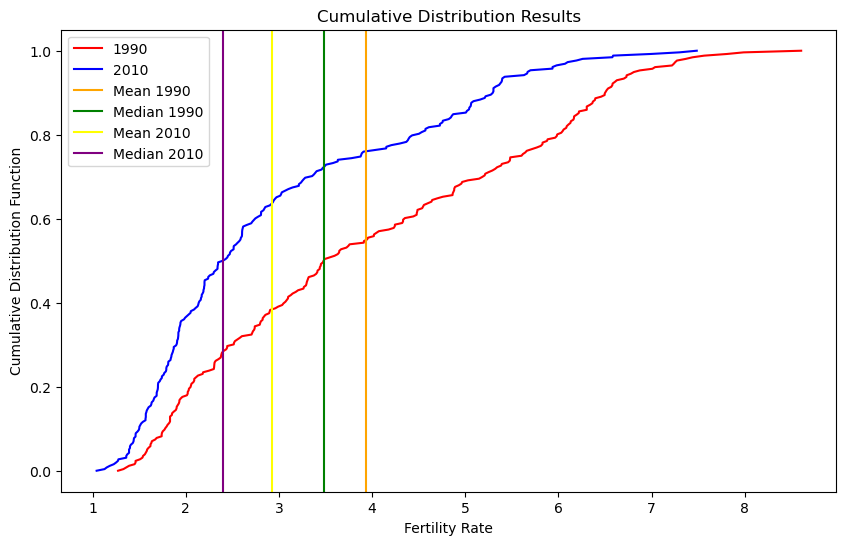

In [32]:
# Question Four
# The World Bank Indicators provide variables called “Fertility rate, total (births per woman)” and “GDP per capita (current US$)”.
# Make a scatter plot of Fertility rate versus GDP per capita for all countries in 2010. Produce cumulative distribution functions for the
# fertility rate variable using data from 1990 and 2010 respectively.Use vertical lines to indicate the mean and median. Use a legend to
# explain which is the mean and which is the median. Have fertility rates changed over this twenty-year period?

# *************************Solution**********************************#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#.........................................Reading the datasets....................................#
fertility_df = pd.read_excel('fertility_rate.xls', skiprows=3, usecols="E:BO")
gdp_df = pd.read_excel('GDPDataset.xls', skiprows=3, usecols="E:BO")

#.........................................Data selection for 2010....................................#
fertility_2010 = fertility_df['2010']
gdp_2010 = gdp_df['2010']

#.........................................Plotting for Fertility rate vs GDP per capita in 2010....................................#
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdp_2010, y=fertility_2010)
plt.title('Fertility rate vs GDP per capita in 2010')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Fertility rate (births per woman)')
plt.grid(True)
plt.show()

#.........................................Fertility rate in 1990 and 2010....................................#
fertility_1990 = fertility_df['1990'].dropna().sort_values()
fertility_2010 = fertility_2010.dropna().sort_values()

#.........................................Finding the cumulative distribution for 1990 and 2010....................................#
cdf_1990 = np.linspace(0, 1, len(fertility_1990))
cdf_2010 = np.linspace(0, 1, len(fertility_2010))

#.........................................Plotting the CDFs....................................#
plt.figure(figsize=(10,6))
plt.title('Cumulative Distribution Results')
plt.plot(fertility_1990, cdf_1990, label='1990', color='red')
plt.plot(fertility_2010, cdf_2010, label='2010', color='blue')
plt.axvline(fertility_1990.mean(), color='orange', label='Mean 1990')
plt.axvline(fertility_1990.median(), color='green', label='Median 1990')
plt.axvline(fertility_2010.mean(), color='yellow', label='Mean 2010')
plt.axvline(fertility_2010.median(), color='purple', label='Median 2010')
plt.legend()
plt.xlabel('Fertility Rate')
plt.ylabel('Cumulative Distribution Function')
plt.show()





/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx

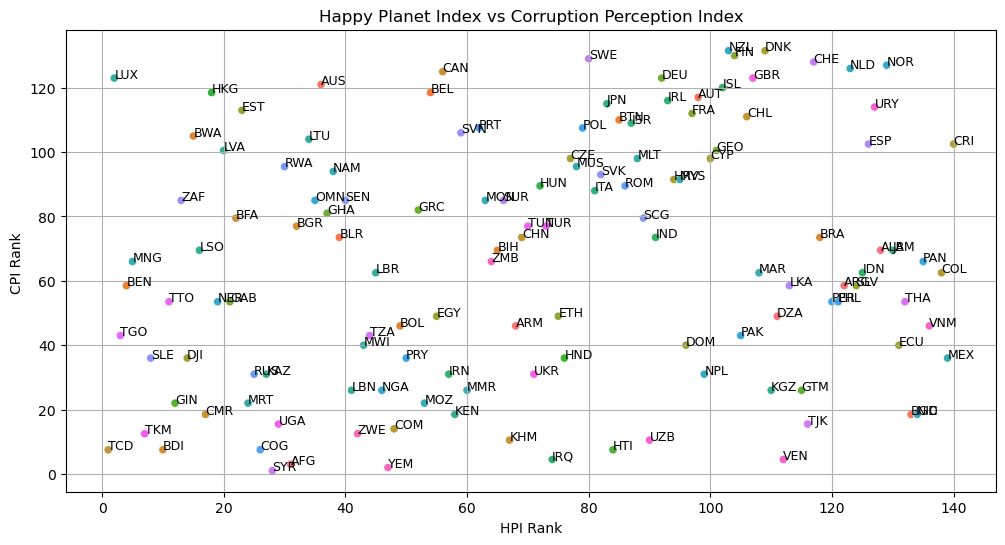

In [47]:
# Question Five
# Download the data for the “Happy Planet Index” from hpi data and “Corruption Perceptions Index” from https://www.transparency.org/en/cpi/2016/index/nzl. 
# Both datasets are available as excel spread-sheets. Find matching countries for both indices and make a carefully labelled scatter plot 
# of HPI against CPI to demonstrate the relationship using ranks in both cases. Are there any countries that stand out as being unusual?

# *************************Solution**********************************#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#.........................................Reading the datasets....................................#
hpi_df = pd.read_excel('hpi-data-2016.xlsx', sheet_name = 'Complete HPI data', skiprows= 5)
cpi_df = pd.read_excel('CPI2016_Results.xlsx', sheet_name = 'CPI 2015-2016')

#.........................................Merging the datasets....................................#
merged_df = hpi_df.merge(cpi_df, on =['Country'], how = 'left')

#.........................................Ranking the HPI and CPI values....................................#
merged_df['HPI Rank'] = merged_df['HPI Rank'].rank(ascending=False)
merged_df['CPI Rank'] = merged_df['CPI 2016 Rank'].rank(ascending=False)
merged_df.fillna(0)
#.........................................Plotting HPI vs CPI ranks....................................#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='HPI Rank', y='CPI Rank', hue='Country', legend=False)
for i, row in merged_df.iterrows():
    plt.text(row['HPI Rank'], row['CPI Rank'], row['WB Code'], fontsize=9)
plt.title('Happy Planet Index vs Corruption Perception Index')
plt.xlabel('HPI Rank')
plt.ylabel('CPI Rank ')
plt.grid(True)
plt.show()
